<a href="https://colab.research.google.com/github/AMIN-nsri/fuzzy-logic-system-for-sport-exercise-recommendation/blob/main/sport_exercise_recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Library Importing**

In [1]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.9 MB/s eta 0:00:00


## **Membership Functions**

In [2]:
# Input variables
fitness = ctrl.Antecedent(np.arange(0, 11, 1), 'fitness')  # 0: Beginner, 10: Advanced
energy = ctrl.Antecedent(np.arange(0, 11, 1), 'energy')    # 0: Low, 10: High
goal = ctrl.Antecedent(np.arange(0, 3, 1), 'goal')          # 0: Weight Loss, 1: Muscle Gain, 2: General Fitness
age = ctrl.Antecedent(np.arange(10, 81, 1), 'age')          # in years
weight = ctrl.Antecedent(np.arange(40, 121, 1), 'weight')   # in kg
experience = ctrl.Antecedent(np.arange(0, 11, 1), 'experience')
motivation = ctrl.Antecedent(np.arange(0, 11, 1), 'motivation')

# Output variables
intensity = ctrl.Consequent(np.arange(0, 11, 1), 'intensity')  # 0: Low, 10: High
duration = ctrl.Consequent(np.arange(0, 61, 1), 'duration')    # in minutes

# Membership functions for fitness
fitness['beginner'] = fuzz.trimf(fitness.universe, [0, 0, 4])
fitness['intermediate'] = fuzz.trimf(fitness.universe, [2, 5, 8])
fitness['advanced'] = fuzz.trimf(fitness.universe, [6, 10, 10])

# Membership functions for energy
energy['low'] = fuzz.trimf(energy.universe, [0, 0, 4])
energy['medium'] = fuzz.trimf(energy.universe, [3, 5, 7])
energy['high'] = fuzz.trimf(energy.universe, [6, 10, 10])

# Membership functions for goal
goal['weight_loss'] = fuzz.trimf(goal.universe, [0, 0, 0.5])
goal['muscle_gain'] = fuzz.trimf(goal.universe, [0.5, 1, 1.5])
goal['general'] = fuzz.trimf(goal.universe, [1.5, 2, 2])

# Membership functions for age
age['young'] = fuzz.trimf(age.universe, [10, 20, 35])
age['middle'] = fuzz.trimf(age.universe, [30, 45, 60])
age['elder'] = fuzz.trimf(age.universe, [55, 70, 80])

# Membership functions for weight
weight['underweight'] = fuzz.trimf(weight.universe, [40, 45, 55])
weight['normal'] = fuzz.trimf(weight.universe, [50, 65, 80])
weight['overweight'] = fuzz.trimf(weight.universe, [75, 100, 120])

# Membership functions for intensity
intensity['low'] = fuzz.trimf(intensity.universe, [0, 0, 4])
intensity['medium'] = fuzz.trimf(intensity.universe, [3, 5, 7])
intensity['high'] = fuzz.trimf(intensity.universe, [6, 10, 10])

# Membership functions for duration
duration['short'] = fuzz.trimf(duration.universe, [0, 0, 20])
duration['medium'] = fuzz.trimf(duration.universe, [15, 30, 45])
duration['long'] = fuzz.trimf(duration.universe, [40, 60, 60])

experience['low'] = fuzz.trimf(experience.universe, [0, 0, 4])
experience['medium'] = fuzz.trimf(experience.universe, [3, 5, 7])
experience['high'] = fuzz.trimf(experience.universe, [6, 10, 10])

motivation['low'] = fuzz.trimf(motivation.universe, [0, 0, 4])
motivation['medium'] = fuzz.trimf(motivation.universe, [3, 5, 7])
motivation['high'] = fuzz.trimf(motivation.universe, [6, 10, 10])

### **Visualizing Membership Functions**

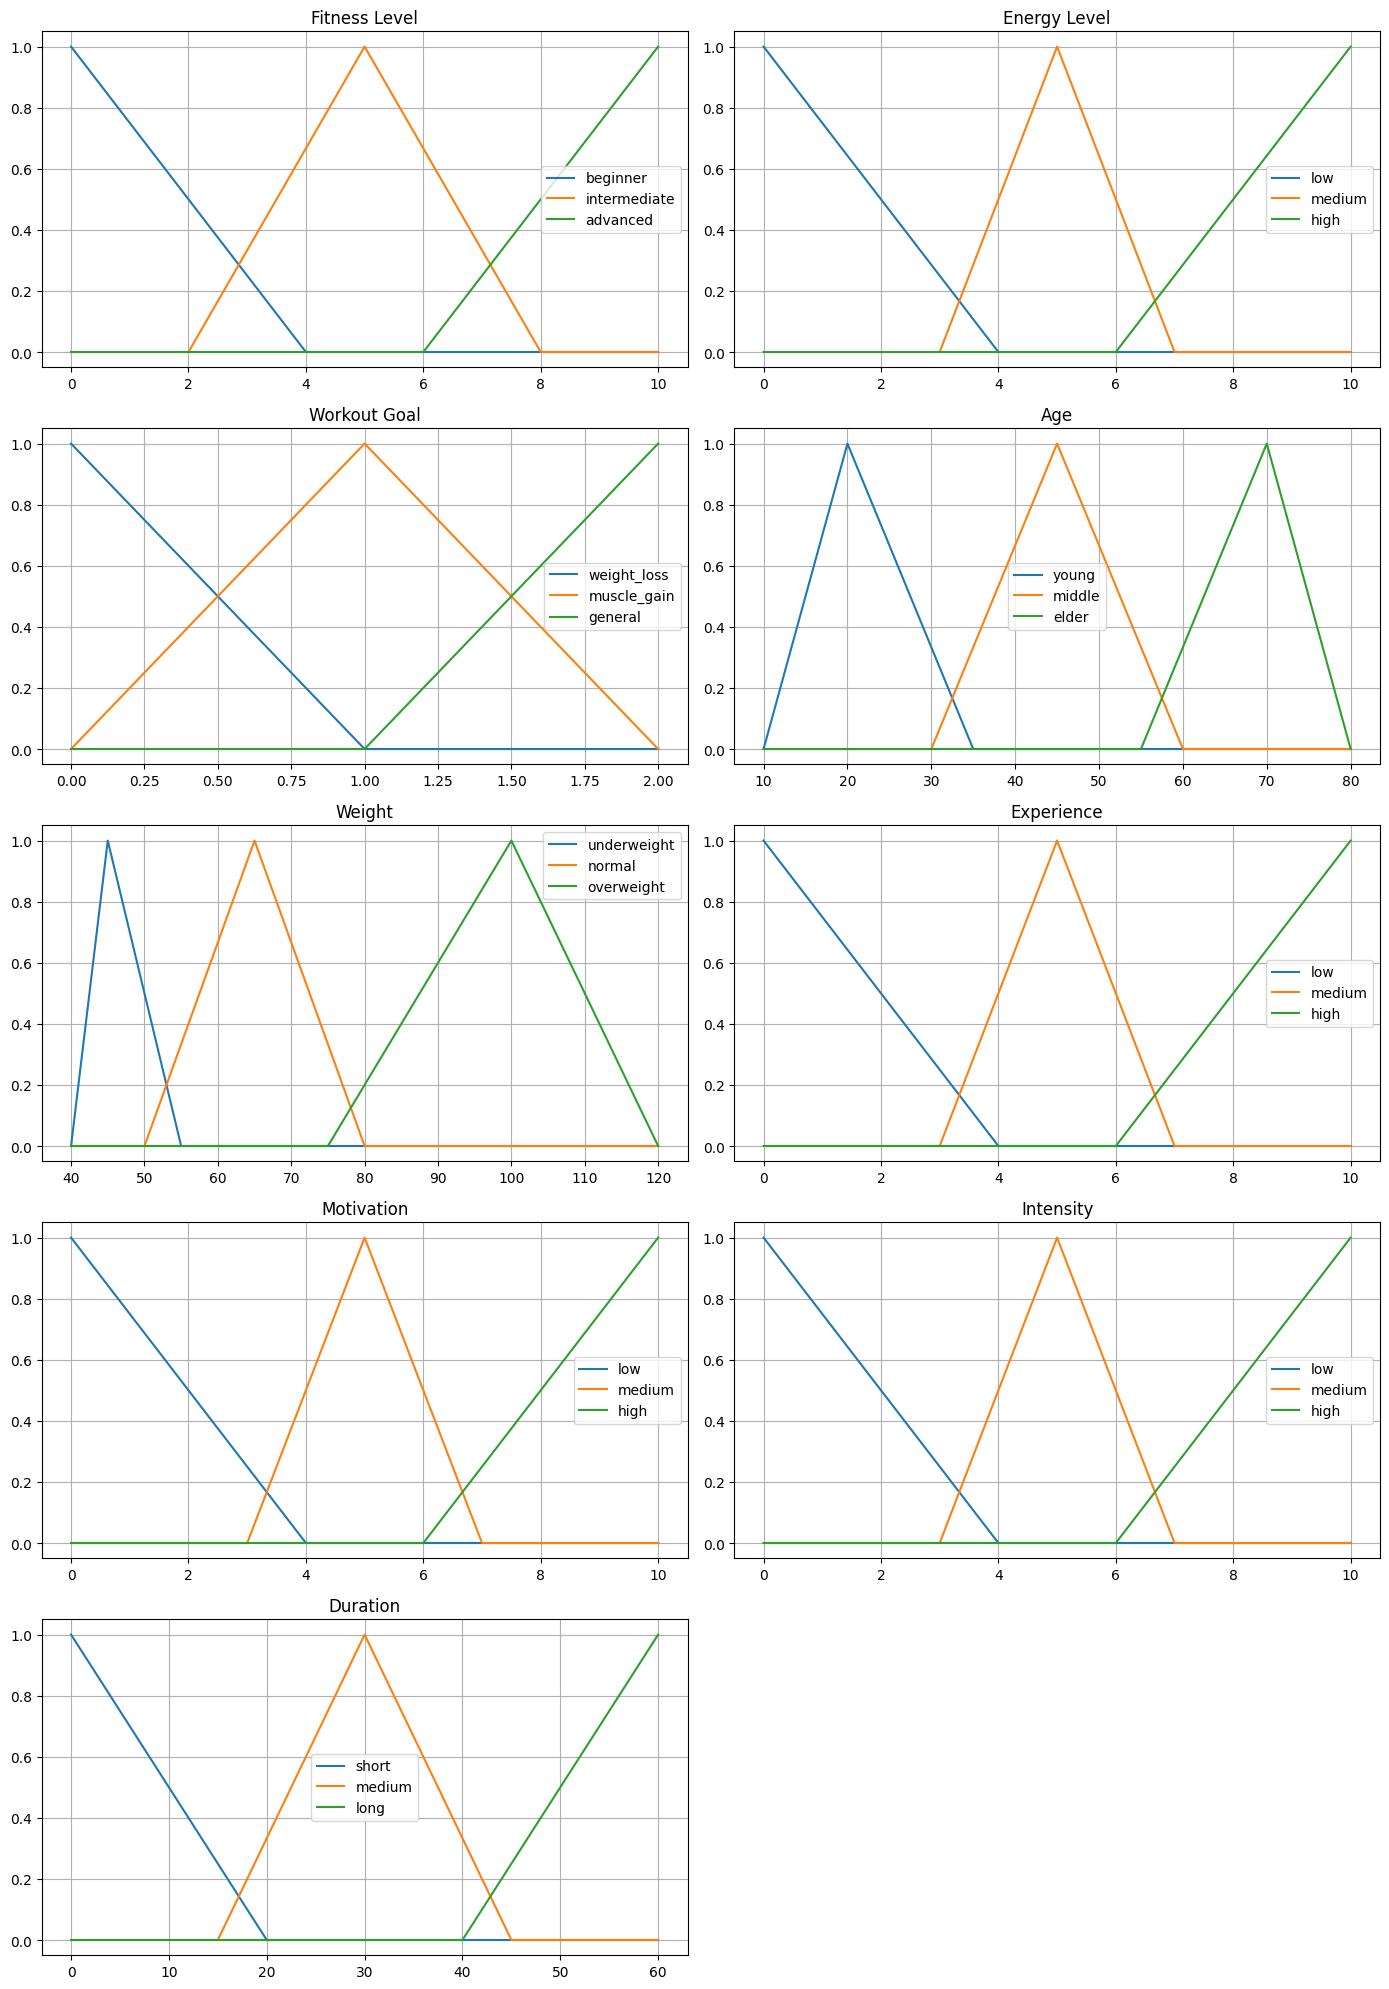

In [20]:
def plot_mf(var, var_name, ax):
    for label in var.terms:
        mf = var.terms[label].mf
        ax.plot(var.universe, mf, label=label)
    ax.set_title(var_name)
    ax.legend()
    ax.grid(True)

fig, axs = plt.subplots(5, 2, figsize=(14, 20))
axs = axs.flatten()

plot_mf(fitness, 'Fitness Level', axs[0])
plot_mf(energy, 'Energy Level', axs[1])
plot_mf(goal, 'Workout Goal', axs[2])
plot_mf(age, 'Age', axs[3])
plot_mf(weight, 'Weight', axs[4])
plot_mf(experience, 'Experience', axs[5])
plot_mf(motivation, 'Motivation', axs[6])
plot_mf(intensity, 'Intensity', axs[7])
plot_mf(duration, 'Duration', axs[8])

fig.delaxes(axs[9])

plt.tight_layout()
plt.show()

## **Fuzzy Rules**

In [35]:
# Fuzzy rules
rules = [
    ctrl.Rule(fitness['beginner'] , duration['short']),  # Beginners might have shorter workouts
    ctrl.Rule(fitness['advanced'] , duration['long']),   # Advanced users might have longer workouts
    ctrl.Rule(energy['low'], duration['short']),        # Low energy could lead to shorter workouts
    ctrl.Rule(goal['weight_loss'], duration['medium']), # Weight loss might involve moderate duration
    ctrl.Rule(age['elder'], duration['short']),
    ctrl.Rule(fitness['advanced'] & energy['high'], duration['long']),

    ctrl.Rule(fitness['advanced'] & energy['high'], duration['long']),
    ctrl.Rule(fitness['advanced'] & energy['high'], intensity['high']),
    ctrl.Rule(goal['weight_loss'] & age['elder'], duration['short']),
    ctrl.Rule(goal['muscle_gain'] & energy['medium'], intensity['medium']),
    ctrl.Rule(age['young'] & fitness['intermediate'], duration['long']),
    ctrl.Rule(weight['overweight'] & goal['weight_loss'], duration['long']),
    ctrl.Rule(fitness['intermediate'] & energy['medium'], intensity['medium']),
    ctrl.Rule(goal['general'] & weight['normal'], duration['medium']),
    ctrl.Rule(experience['low'], intensity['low']),
    ctrl.Rule(motivation['high'], intensity['high']),
]

## **System Simulation**

In [36]:
# Control system
exercise_ctrl = ctrl.ControlSystem(rules)
exercise = ctrl.ControlSystemSimulation(exercise_ctrl)

### **Input Data**

In [39]:
def calculate_exercise_params(fitness_level=3, energy_level=4, goal_type=0, age=65, weight=85, experience_level=2, motivation_level=8):
  """Calculates base intensity and duration for an exercise regimen.

  Args:
    fitness_level: Fitness level (0-10, 0: Beginner, 10: Advanced).
    energy_level: Energy level (0-10, 0: Low, 10: High).
    goal_type: Workout goal (0: Weight Loss, 1: Muscle Gain, 2: General Fitness).
    age: Age in years.
    weight: Weight in kg.
    experience_level: Experience level (0-10, 0: Low, 10: High).
    motivation_level: Motivation level (0-10, 0: Low, 10: High).

  Returns:
    A tuple containing the base intensity and base duration.
  """
  exercise.input['fitness'] = fitness_level
  exercise.input['energy'] = energy_level
  exercise.input['goal'] = goal_type
  exercise.input['age'] = age
  exercise.input['weight'] = weight
  exercise.input['experience'] = experience_level
  exercise.input['motivation'] = motivation_level

  exercise.compute()

  base_intensity = exercise.output['intensity']
  base_duration = exercise.output['duration']

  return base_intensity, base_duration

# Example Usage
base_intensity, base_duration = calculate_exercise_params()
print("Base Intensity:", round(base_intensity, 2))
print("Base Duration (min):", round(base_duration, 2))

Base Intensity: 5.0
Base Duration (min): 27.88


### **Personalize System**

In [40]:
def scale_exercise_params(base_intensity, base_duration, age=65, user_pref='default'):
  """Scales base intensity and duration based on age and user preference.

  Args:
    base_intensity: Base intensity value.
    base_duration: Base duration value.
    age: Age of the user.
    user_pref: User preference ('lighter', 'harder', 'default'). Defaults to 'default'.

  Returns:
    A tuple containing the scaled intensity and scaled duration.
  """

  def age_weight(age_val):
    return 0.85 if age_val > 60 else 1.0

  # Apply age weight
  scaled_intensity = base_intensity * age_weight(age)
  scaled_duration = base_duration * age_weight(age)

  # Apply user preference
  if user_pref == 'lighter':
    scaled_intensity *= 0.9
    scaled_duration *= 1.1
  elif user_pref == 'harder':
    scaled_intensity *= 1.1
    scaled_duration *= 0.9

  return scaled_intensity, scaled_duration

# Example Usage
scaled_intensity, scaled_duration = scale_exercise_params(base_intensity, base_duration)
print("Scaled Intensity:", round(scaled_intensity, 2))
print("Scaled Duration (min):", round(scaled_duration, 2))

Scaled Intensity: 4.25
Scaled Duration (min): 23.7


### **Output and Visualization**

Scenario:
  Fitness: 3, Energy: 4, Goal: 0, Age: 65, Weight: 85, Experience: 2, Motivation: 8, User Pref: lighter
  Base Intensity: 5.0
  Base Duration: 27.88
  Scaled Intensity: 3.82
  Scaled Duration: 26.07


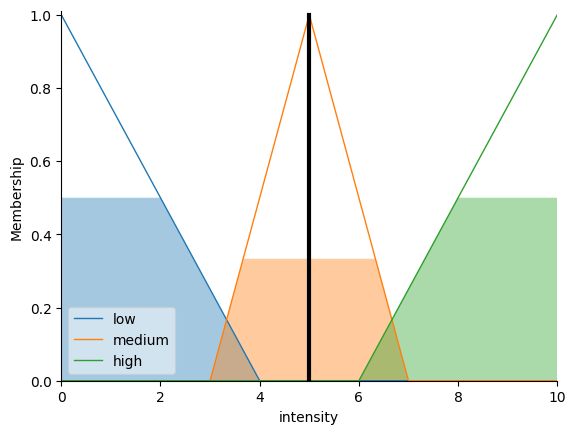

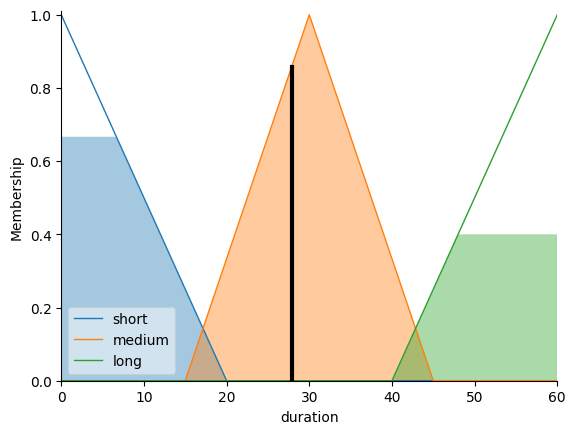

---
Scenario:
  Fitness: 7, Energy: 8, Goal: 1, Age: 30, Weight: 70, Experience: 5, Motivation: 6, User Pref: default
  Base Intensity: 8.24
  Base Duration: 51.56
  Scaled Intensity: 8.24
  Scaled Duration: 51.56


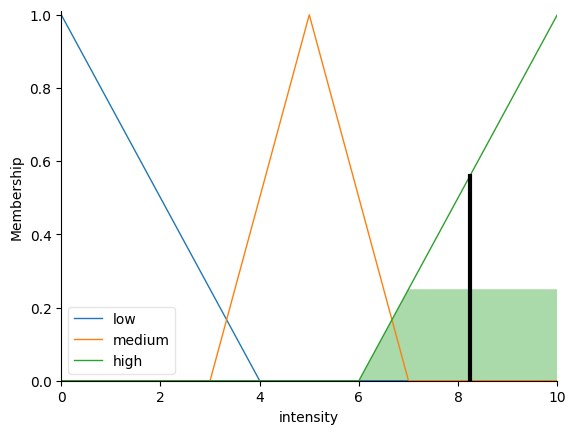

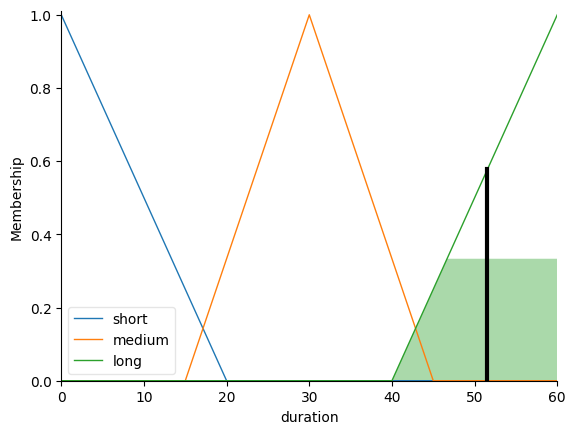

---
Scenario:
  Fitness: 5, Energy: 6, Goal: 0, Age: 45, Weight: 80, Experience: 8, Motivation: 9, User Pref: harder
  Base Intensity: 7.0
  Base Duration: 33.89
  Scaled Intensity: 7.7
  Scaled Duration: 30.5


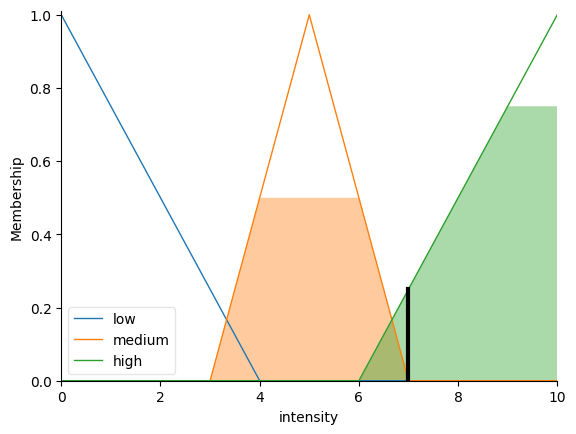

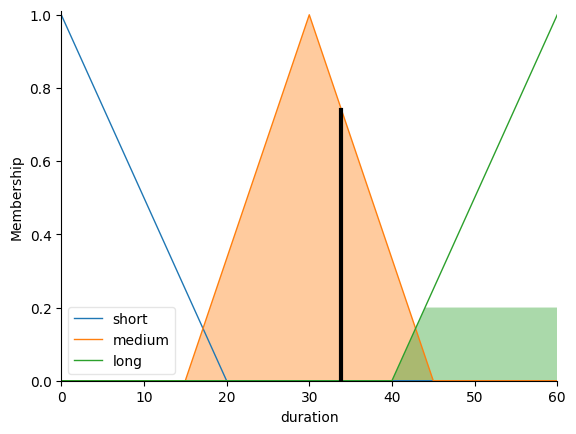

---


In [43]:
# Simulate with different values
scenarios = [
    [3, 4, 0, 65, 85, 2, 8, 'lighter'], # fitness, energy, goal, age, weight, experience, motivation, user_pref
    [7, 8, 1, 30, 70, 5, 6, 'default'],
    [5, 6, 0, 45, 80, 8, 9, 'harder']
]

for scenario in scenarios:
    base_intensity, base_duration = calculate_exercise_params(scenario[0], scenario[1], scenario[2], scenario[3], scenario[4], scenario[5], scenario[6])
    scaled_intensity, scaled_duration = scale_exercise_params(base_intensity, base_duration, scenario[3], scenario[7])

    print(f"Scenario:")
    print(f"  Fitness: {scenario[0]}, Energy: {scenario[1]}, Goal: {scenario[2]}, Age: {scenario[3]}, Weight: {scenario[4]}, Experience: {scenario[5]}, Motivation: {scenario[6]}, User Pref: {scenario[7]}")
    print(f"  Base Intensity: {round(base_intensity, 2)}")
    print(f"  Base Duration: {round(base_duration, 2)}")
    print(f"  Scaled Intensity: {round(scaled_intensity, 2)}")
    print(f"  Scaled Duration: {round(scaled_duration, 2)}")
    # Output membership plots
    intensity.view(sim=exercise)
    duration.view(sim=exercise)
    plt.show()
    print("---")
